In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
plt.style.use("dark_background")

In [2]:
train= pd.read_csv("https://raw.githubusercontent.com/ashish-ash303/Loan-Defaulter-Prediction/main/Training%20Data.csv")
test= pd.read_csv("https://raw.githubusercontent.com/ashish-ash303/Loan-Defaulter-Prediction/main/Test%20Data.csv")

In [3]:
input_cols= train.columns[1:-1]
list((input_cols))

['Income',
 'Age',
 'Experience',
 'Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'Profession',
 'CITY',
 'STATE',
 'CURRENT_JOB_YRS',
 'CURRENT_HOUSE_YRS']

In [4]:
target_cols= "Risk_Flag"
print(target_cols)

Risk_Flag


In [5]:
input_df= train[input_cols].copy()
input_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14


In [6]:
target_df= train[target_cols].copy()
target_df

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

In [7]:
train["CITY"].nunique()

317

In [8]:
train["Profession"].nunique()

51

In [9]:
train.STATE.nunique()

29

In [10]:
input_df= input_df.drop(columns=["CITY", "STATE"], axis= 1)
input_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,3,13
1,7574516,40,10,single,rented,no,Software_Developer,9,13
2,3991815,66,4,married,rented,no,Technical_writer,4,10
3,6256451,41,2,single,rented,yes,Software_Developer,2,12
4,5768871,47,11,single,rented,no,Civil_servant,3,14


In [11]:
test_df= test.drop(columns=["ID"], axis=1)
test_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


# Identifying Numeric and Categorical Columns

In [12]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CURRENT_JOB_YRS    252000 non-null  int64 
 8   CURRENT_HOUSE_YRS  252000 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 17.3+ MB


In [13]:
numeric_cols= input_df.select_dtypes(include=["int64"]).columns.tolist()
numeric_cols

['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

In [14]:
categorical_cols= input_df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols

['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession']

In [15]:
input_df["House_Ownership"].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [16]:
input_df["Car_Ownership"].unique()

array(['no', 'yes'], dtype=object)

In [17]:
input_df["Married/Single"].unique()

array(['single', 'married'], dtype=object)

# Scaling Numeric Columns

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler= MinMaxScaler()

In [20]:
scaler.fit(input_df[numeric_cols])

MinMaxScaler()

In [21]:
input_df[numeric_cols]= scaler.transform(input_df[numeric_cols])

In [22]:
input_df[numeric_cols].describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,0.499198,0.499208,0.504222,0.452420,0.499448
std,0.288130,0.294204,0.300129,0.260504,0.349759
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249529,0.241379,0.250000,0.214286,0.250000
50%,0.499557,0.500000,0.500000,0.428571,0.500000
75%,0.747495,0.758621,0.750000,0.642857,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Encode Categorical Columns

In [23]:
input_df[categorical_cols].head(5)

,Married/Single,House_Ownership,Car_Ownership,Profession
0,single,rented,no,Mechanical_engineer
1,single,rented,no,Software_Developer
2,married,rented,no,Technical_writer
3,single,rented,yes,Software_Developer
4,single,rented,no,Civil_servant


In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
encoder= OneHotEncoder(sparse= False, handle_unknown= "ignore")

In [26]:
encoder.fit(input_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [28]:
encoded_cols= list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

58

In [29]:
input_df[encoded_cols]= encoder.transform(input_df[categorical_cols])
input_df[encoded_cols].head()

,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,...,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
input_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_married,...,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer
0,0.129487,0.034483,0.15,single,rented,no,Mechanical_engineer,0.214286,0.75,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.757206,0.327586,0.50,single,rented,no,Software_Developer,0.642857,0.75,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.398564,0.775862,0.20,married,rented,no,Technical_writer,0.285714,0.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.625263,0.344828,0.10,single,rented,yes,Software_Developer,0.142857,0.50,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.576454,0.448276,0.55,single,rented,no,Civil_servant,0.214286,1.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
input_df.shape

(252000, 67)

# Splitting Data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_inputs, val_inputs, train_targets, val_targets= train_test_split(input_df[numeric_cols + encoded_cols],
                 target_df,
                 test_size= 0.25,
                 random_state= 20)

In [34]:
train_inputs.shape

(189000, 63)

In [35]:
val_inputs.shape

(63000, 63)

In [36]:
val_targets.shape

(63000,)

In [37]:
train_targets.shape

(189000,)

In [38]:
test_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


# Training Logistic Regression model

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model= LogisticRegression(solver= "liblinear", random_state= 25, max_iter= 150)

In [41]:
model.fit(train_inputs[numeric_cols+encoded_cols], train_targets)

LogisticRegression(max_iter=150, random_state=25, solver='liblinear')

In [42]:
model.coef_.tolist()

[[-0.03857562757243838,
  -0.2117412551027945,
  -0.4251680662406704,
  0.09134241726280798,
  -0.008870747519112977,
  -0.5336457124340261,
  -0.31529630038037476,
  -0.34189891466870803,
  -0.451069399116111,
  -0.05597369902822305,
  -0.347620147586649,
  -0.501321865227521,
  0.12654836897452876,
  -0.06965645351422911,
  0.11283786409548058,
  0.26684875896703686,
  -0.008057899615545115,
  0.062404934501254526,
  0.020508614302697868,
  0.2607096583536548,
  -0.051599035969331894,
  -0.11396798737918877,
  0.10825319606312753,
  -0.10716124689990686,
  -0.0508661240737817,
  0.020408597776383566,
  0.022344067021926643,
  -0.02850030623293455,
  -0.13691584731561446,
  -0.19554094893081983,
  -0.15522606354274257,
  -0.06624252248645984,
  -0.25952011830769006,
  -0.12567258956063088,
  -0.061219395247157596,
  -0.17921405495551412,
  0.08605542046582514,
  -0.057285851103121344,
  0.21495326462477699,
  -0.06823749729204892,
  0.10567294301668656,
  -0.2613730497158148,
  0.0260

In [43]:
model.intercept_

array([-0.84894201])

# Making Prediction and Evaluating the model

In [44]:
train_preds= model.predict(train_inputs[numeric_cols + encoded_cols])

In [45]:
train_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
pd.value_counts(train_preds)

0    189000
dtype: int64

In [47]:
train_targets

247880    0
178765    0
90252     0
56089     0
251080    0
         ..
220060    0
23775     1
37135     0
92634     0
245091    0
Name: Risk_Flag, Length: 189000, dtype: int64

In [48]:
train_probs= model.predict_proba(input_df[numeric_cols+encoded_cols])
train_probs

array([[0.85670588, 0.14329412],
       [0.83359564, 0.16640436],
       [0.87649146, 0.12350854],
       ...,
       [0.87864255, 0.12135745],
       [0.85179818, 0.14820182],
       [0.89520058, 0.10479942]])

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(train_targets, train_preds)

0.8768042328042328

# Making Prediction On Test Data

In [51]:
def pred_input(single_input):
    input_df= test_df
    
    input_df[numeric_cols]= scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols]= encoder.transform(input_df[categorical_cols])
    x_input= input_df[numeric_cols+encoded_cols]
    pred= model.predict(x_input)[0]
    prob= model.predict_proba(x_input)[0][list(model.classes_).index(pred)]
    
    return pred,prob

In [52]:
pred_input(test_df)

(0, 0.8704090047615639)

# Training Decision Tree Model

In [54]:
from sklearn.tree import DecisionTreeClassifier 

In [57]:
model= DecisionTreeClassifier(random_state= 25, max_depth= 5)

In [63]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets) 

DecisionTreeClassifier(max_depth=5, random_state=25)

In [64]:
model.score(train_inputs[numeric_cols+encoded_cols], train_targets)

0.8776031746031746

In [65]:
train_preds= model.predict(train_inputs[numeric_cols+encoded_cols])

In [66]:
train_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
pd.value_counts(train_preds)

0    188631
1       369
dtype: int64

In [68]:
accuracy_score(train_preds, train_targets)

0.8776031746031746

In [69]:
from sklearn.tree import plot_tree, export_text

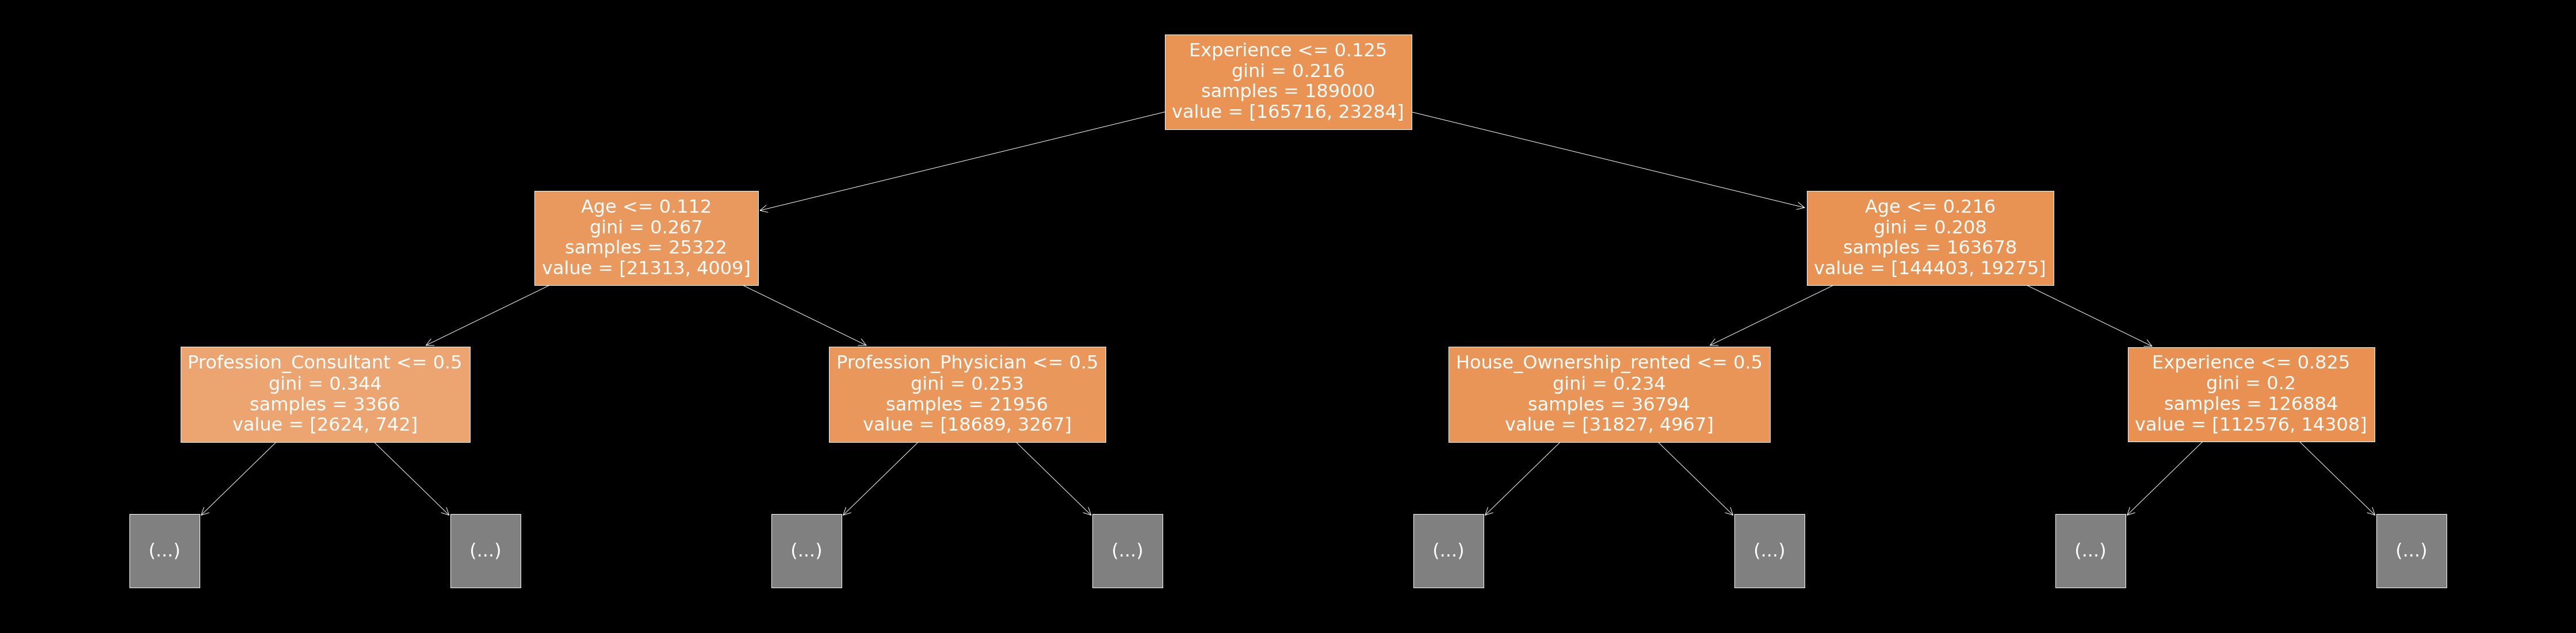

In [71]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names= train_inputs[numeric_cols+encoded_cols].columns, max_depth= 2, filled= True);

In [72]:
tree_text= export_text(model, max_depth= 10, feature_names= list(train_inputs[numeric_cols+encoded_cols].columns))
print(tree_text[:5000])

|--- Experience <= 0.13
|   |--- Age <= 0.11
|   |   |--- Profession_Consultant <= 0.50
|   |   |   |--- Profession_Police_officer <= 0.50
|   |   |   |   |--- Profession_Chartered_Accountant <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Profession_Chartered_Accountant >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Profession_Police_officer >  0.50
|   |   |   |   |--- CURRENT_HOUSE_YRS <= 0.62
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- CURRENT_HOUSE_YRS >  0.62
|   |   |   |   |   |--- class: 0
|   |   |--- Profession_Consultant >  0.50
|   |   |   |--- Income <= 0.08
|   |   |   |   |--- Age <= 0.09
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  0.09
|   |   |   |   |   |--- class: 0
|   |   |   |--- Income >  0.08
|   |   |   |   |--- Income <= 0.74
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Income >  0.74
|   |   |   |   |   |--- class: 1
|   |--- Age >  0.11
|   |   |--- Profession_Physician <= 0.50
|   |   |   |-

In [75]:
importance_df= pd.DataFrame({
    "feature": train_inputs[numeric_cols+encoded_cols].columns,
    "importance": model.feature_importances_
}).sort_values("importance", ascending= False)

In [76]:
importance_df.head(10)

,feature,importance
0,Income,0.217420
2,Experience,0.169954
28,Profession_Dentist,0.103732
1,Age,0.094408
50,Profession_Police_officer,0.068042
27,Profession_Consultant,0.067090
19,Profession_Chartered_Accountant,0.059671
4,CURRENT_HOUSE_YRS,0.046509
9,House_Ownership_rented,0.038082
11,Car_Ownership_yes,0.034966


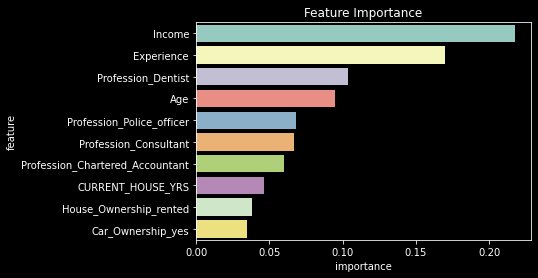

In [77]:
plt.title('Feature Importance')
sns.barplot(data= importance_df.head(10),
           x= "importance",
           y= "feature");

In [155]:
def pred_input(single_input):
    input_df= test_df
    input_df[numesric_cols]= scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols]= encoder.transform(input_df[categorical_cols])
    x_input= input_df[numeric_cols+encoded_cols]
    pred= model.predict(x_input)[0]
    prob= model.predict_proba(x_input)[0][list(model.classes_).index(pred)]
    return pred,prob

In [79]:
pred_input(test_df)

(0, 0.8173076923076923)